In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import operator
import random
train = pd.read_json('/content/drive/MyDrive/SEM3/CGAS/Assignment2/train.json')
test = pd.read_json('/content/drive/MyDrive/SEM3/CGAS/Assignment2/test.json')

# Number of recipes
print("Number of recipes : ",len(train))

# Number of cuisines
cuisines = train.cuisine.unique()

print("Number of cuisines : ", len(cuisines))

#Get total number of ingredients from dataset
total_ingre = []
for lst in train['ingredients']:
  total_ingre.extend(lst)
print(len(total_ingre))

#Initialising Nature Basket
nb=list(set(total_ingre))
print(len(nb))
print(type(nb))
nb = random.sample(nb,5000)
print(nb)
print(len(nb))

#Initialising Kitchen Basket
kb = random.sample(nb,50)
print(kb)
print("kb type ", type(kb))
print(len(kb))
recipe_prim = {}
# number of ingr per recipe - fixed.
recipe_size =10
# generations
epochs = 5
curr_epoch = 0

#initial recipes of the cuisine
number_of_recipes =500
#number of ingr to be mutated

#ratio between the sizes of pool of ingredients and the pool of recipes
m = 10

#Assigning fitness values to ingredients 
fitness_values = {}
for ing in nb:
  # print(ing)
  fitness_values[ing] = random.randint(0,99)
i =0
while i < number_of_recipes:
  recipe_prim['recipe'+str(i+1)] = random.sample(kb, recipe_size)
  i = i+1
print(len(recipe_prim))

Number of recipes :  39774
Number of cuisines :  20
428275
6714
<class 'list'>
['corn flakes', 'refried beans', 'liver', 'tart filling', 'plain chocolate', 'beet juice', 'zucchini', 'dark chocolate cocoa powder', 'poppyseeds', 'fava beans', 'leftover steak', 'walnut oil', 'petite peas', 'uncooked rigatoni', 'grained', 'round loaf', 'sweet gherkin', 'plain breadcrumbs', 'toasted walnuts', 'less sodium mushroom flavored soy sauce', 'fish paste', 'fiddlehead ferns', 'pasta rotel', 'fresh chives', 'mustard sauce', 'vermouth', 'ranch salad dressing mix', 'chop green chilies, undrain', 'low fat coleslaw dressing', 'lemon slices', 'jelly', 'puff pastry', 'anise seed', 'lemon juice', 'parma ham', 'hungarian sweet paprika', 'pumpkin', 'boneless chicken thigh fillets', 'baby okra', 'boneless turkey breast', 'Madeira', 'sage leaves', 'small curd cottage cheese', 'unsweetened cocoa powder', 'orange flavored brandy', 'imitation seafood', 'vegetarian chicken', 'lavender honey', 'cipollini', 'fat ski

Epoch  1  Started

Recipe Size : 10
Kitchen Basket : 50
Nature Basket :  5000
Number of recipe in primordial cuisine epoch 1 = 500


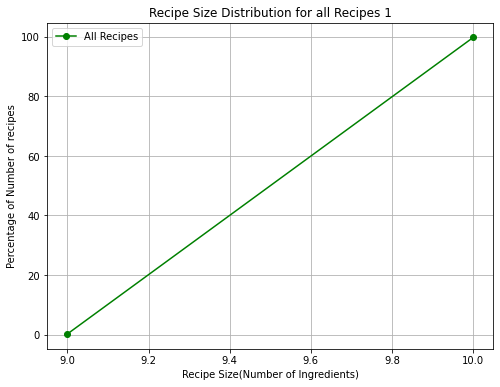

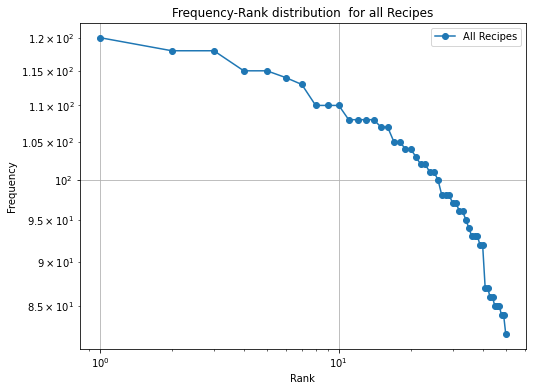

Epoch  1  Ended

Recipe Size : 500
Kitchen Basket : 60
Nature Basket :  4990


Epoch  2  Started

Recipe Size : 10
Kitchen Basket : 60
Nature Basket :  4990
Number of recipe in primordial cuisine epoch 2 = 500


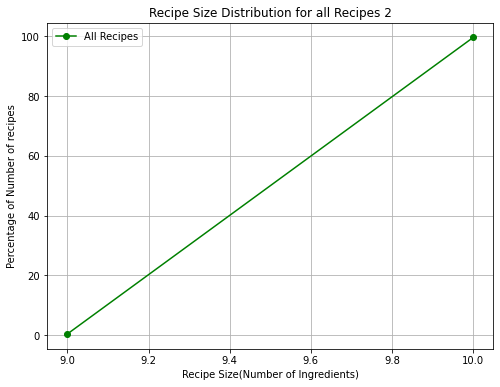

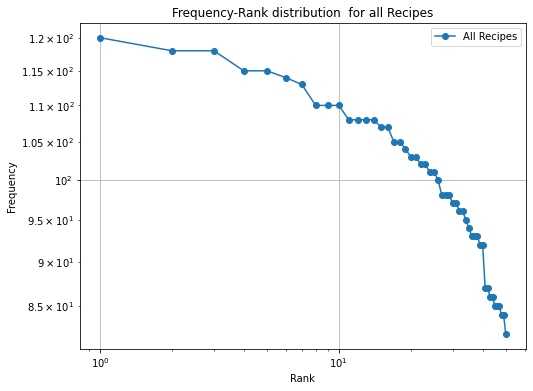

Epoch  2  Ended

Recipe Size : 500
Kitchen Basket : 60
Nature Basket :  4990


Epoch  3  Started

Recipe Size : 10
Kitchen Basket : 60
Nature Basket :  4990
Number of recipe in primordial cuisine epoch 3 = 500


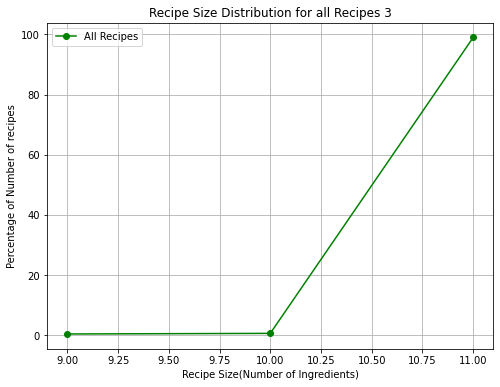

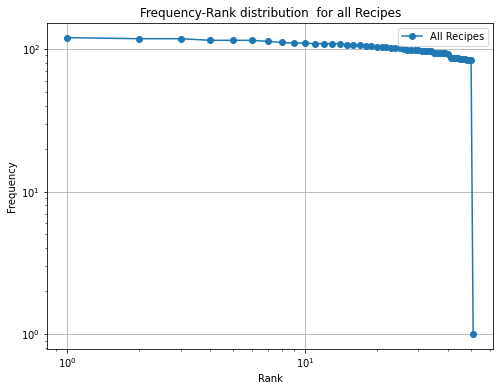

Epoch  3  Ended

Recipe Size : 502
Kitchen Basket : 60
Nature Basket :  4990


Epoch  4  Started

Recipe Size : 10
Kitchen Basket : 60
Nature Basket :  4990
Number of recipe in primordial cuisine epoch 4 = 502


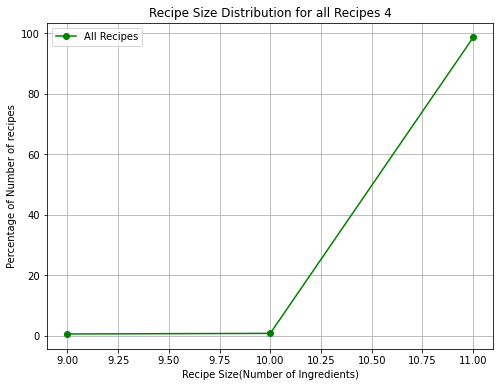

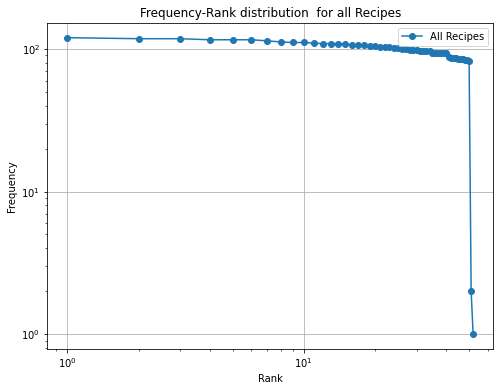

Epoch  4  Ended

Recipe Size : 504
Kitchen Basket : 60
Nature Basket :  4990


Epoch  5  Started

Recipe Size : 10
Kitchen Basket : 60
Nature Basket :  4990
Number of recipe in primordial cuisine epoch 5 = 504


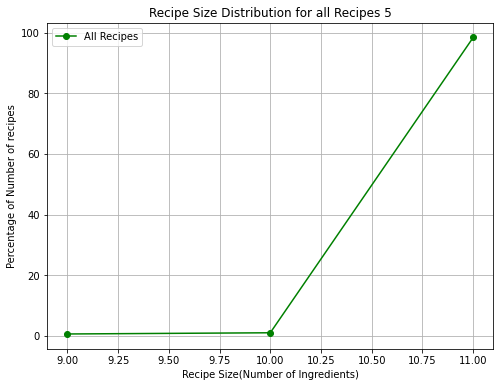

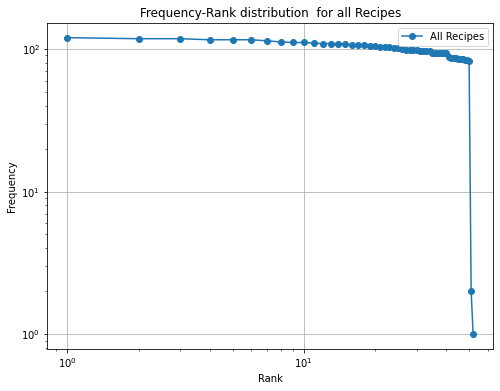

Epoch  5  Ended

Recipe Size : 504
Kitchen Basket : 60
Nature Basket :  4990




In [43]:
n =501
choices_list =[]
while(curr_epoch != epochs):

  print("Epoch ",curr_epoch + 1 , " Started\n")
  print("Recipe Size :",recipe_size)
  print("Kitchen Basket :",len(kb))
  print("Nature Basket : ",len(nb))
  print("Number of recipe in primordial cuisine epoch", curr_epoch + 1, "=", len(recipe_prim))
  number_of_recipes = len(recipe_prim)
  Recipes_Per_Epochs = round((number_of_recipes)/epochs)
  number_of_recipes_new = number_of_recipes + Recipes_Per_Epochs
  kb_new_size = round(number_of_recipes_new/m)

  while(len(kb) != kb_new_size):
    random_i = random.randint(0, len(nb)-1)
    kb.append(nb.pop(random_i))

  while(len(recipe_prim) != number_of_recipes_new  ):
    
      recipe_index = random.randint(1,len(recipe_prim)-1)
      random_recipe = recipe_prim['recipe'+str(recipe_index)]  

      choices = random.randint(0, 2) # del, add, replace
      choices_list.append(choices)
      if choices == 2: 
        while 1:
          ing_index = random.randint(0,recipe_size-1)    
          random_ing = recipe_prim['recipe'+str(recipe_index)][ing_index] 
          j = random.randint(0,kb_new_size-1)  
          
          if(kb[j] not in random_ing ):
            if(fitness_values[kb[j]] > fitness_values[random_ing]):
              random_recipe.remove(random_ing)         
              random_recipe.append(kb[j])
              
              break

      elif choices == 1:
        
        # delete
        while (len(random_recipe)==1):
          recipe_index2 = random.randint(1,len(recipe_prim)-1)
          random_recipe = recipe_prim['recipe'+str(recipe_index2)]
        ing_index = random.randint(0,recipe_size-1)
        random_ing = recipe_prim['recipe'+str(recipe_index)][ing_index]
        # while 1:
        # if(random_ing in random_recipe):
          # p = random.randint(0,recipe_size-1)
        random_recipe.remove(random_ing)
          # recipe_prim['recipe'+str(n)] = random_recipe
        break

      elif choices == 0:
        random_recipe = set(random_recipe)
        # add
        while(1):
          
          ing_index = random.randint(0,recipe_size-1)    
          random_ing = recipe_prim['recipe'+str(recipe_index)][ing_index] 
          j = random.randint(0,kb_new_size-1)  
         
          if(kb[j] not in random_recipe):
            random_recipe.add(kb[j])
            # recipe_prim['recipe'+str(n)] = random_recipe
            break
      random_recipe = list(random_recipe)
      random_recipe.sort()
      recipe_prim['recipe'+str(n)] = random_recipe 
      n = n+1

      if(len(recipe_prim)/len(kb) == 10):
            break

  ##############################################################################
  # Plot for Recipe Size Distribution
  count =[]
  for lst in recipe_prim.keys():
    count.append(len(recipe_prim[lst]))

  recipe_size_data = {}
  for p in count:
    # print(type(p))
    if p not in recipe_size_data:
        recipe_size_data[p] = 1
    else:
        recipe_size_data[p] += 1
            
  for p in recipe_size_data.keys():
      recipe_size_data[p] = recipe_size_data[p]/len(count) * 100

  plt.figure(figsize = (8,6))
  plt.plot(list(sorted(recipe_size_data.keys())),list(sorted(recipe_size_data.values())), marker = 'o' , label = "All Recipes", c ='green')
  plt.ylabel("Percentage of Number of recipes")
  plt.xlabel("Recipe Size(Number of Ingredients)")
  plt.title('Recipe Size Distribution for all Recipes '+ str(curr_epoch +1) )
  plt.legend()
  plt.grid()
  plt.show()
  print("\n")

  ##############################################################################
  # Plot for Frequency Rank Distribution

  total_ingre =[]
  for lst in recipe_prim.keys():
    for lst_ingr in recipe_prim[lst]:
    # total_ingre.extend(lst)
      total_ingre.append(lst_ingr)

  values, counts = np.unique(total_ingre, return_counts=True)
  # print(type(counts))
  # print(values, counts)
  sorted_count = np.sort(counts)[::-1]
  rank =1
  rank_lst = []
  for i in range(sorted_count.shape[0]):
    rank_lst.append(rank)
    rank = rank+1

  plt.figure(figsize = (8,6))
  plt.loglog(rank_lst,sorted_count, marker = 'o',label ="All Recipes" )
  plt.ylabel("Frequency")
  plt.xlabel("Rank")
  plt.title('Frequency-Rank distribution  for all Recipes')
  plt.legend()
  plt.grid()
  plt.show()

  print("Epoch ",curr_epoch + 1, " Ended\n")
  print("Recipe Size :",len(recipe_prim))
  print("Kitchen Basket :",len(kb))
  print("Nature Basket : ",len(nb))
  print("\n")
  if ((kb_new_size) == 0):
        break
  curr_epoch = curr_epoch + 1

       

Time taken to run the code: O(size of kitchen basket) Mutate operation : O(n), where n is the size of primordial cuisine. Time complexity of entire algorithm - O(number of epochs * tc(Mutate operation) ) 
<br>Analysis - The recipe size distribution varies due to addition and deletion operation. The frequency rank follows delta function.

In [44]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/SEM3/CGAS/Assignment2/CGAS_A2_Q2.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/SEM3/CGAS/Assignment2/CGAS_A2_Q2.ipynb to html
[NbConvertApp] Writing 651778 bytes to /content/drive/MyDrive/SEM3/CGAS/Assignment2/CGAS_A2_Q2.html
